<a href="https://colab.research.google.com/github/patil1306sanjana/Classifier_Model/blob/main/churn_prediction_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('churn prediction.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
y = dataset['Exited']

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


Feature Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.24021723, -1.09665089,  0.77986083, ...,  1.64099027,
        -0.57812007, -0.57504086],
       [ 0.75974873,  0.91186722, -0.27382717, ..., -1.55587522,
         1.72974448, -0.57504086],
       [-1.72725557, -1.09665089, -0.9443559 , ...,  1.1038111 ,
        -0.57812007, -0.57504086],
       ...,
       [-0.51484098,  0.91186722,  0.87565065, ..., -1.01507508,
         1.72974448, -0.57504086],
       [ 0.73902369, -1.09665089, -0.36961699, ..., -1.47887193,
        -0.57812007, -0.57504086],
       [ 0.95663657,  0.91186722, -1.32751517, ...,  0.50945854,
        -0.57812007,  1.73900686]])

Build ANN

In [ ]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
X.shape[1]

11

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4543 - accuracy: 0.8051
Epoch 2/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3979 - accuracy: 0.8314
Epoch 3/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8519
Epoch 4/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8555
Epoch 5/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8595
Epoch 6/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8606
Epoch 7/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3392 - accuracy: 0.8601
Epoch 8/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3381 - accuracy: 0.8633
Epoch 9/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3352 - accuracy: 0.8634
Epoch 10/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8635

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_test

1344    1
8167    0
4747    0
5004    1
3124    1
       ..
9107    0
8249    0
8337    0
6279    1
412     0
Name: Exited, Length: 2000, dtype: int64

In [ ]:
model.evaluate(X_test, y_test.to_numpy())

63/63 [==============================] - 1s 3ms/step - loss: 0.3529 - accuracy: 0.8495


[0.3529236316680908, 0.8495000004768372]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1538,   55],
       [ 246,  161]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8495

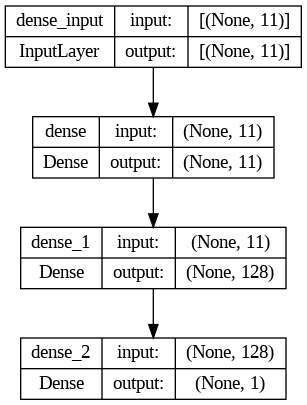

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
pip install ann_visualizer

In [ ]:
from ann_visualizer.visualize import ann_viz;
import graphviz

ann_viz(model,view = True, title="Artificial Neuron");

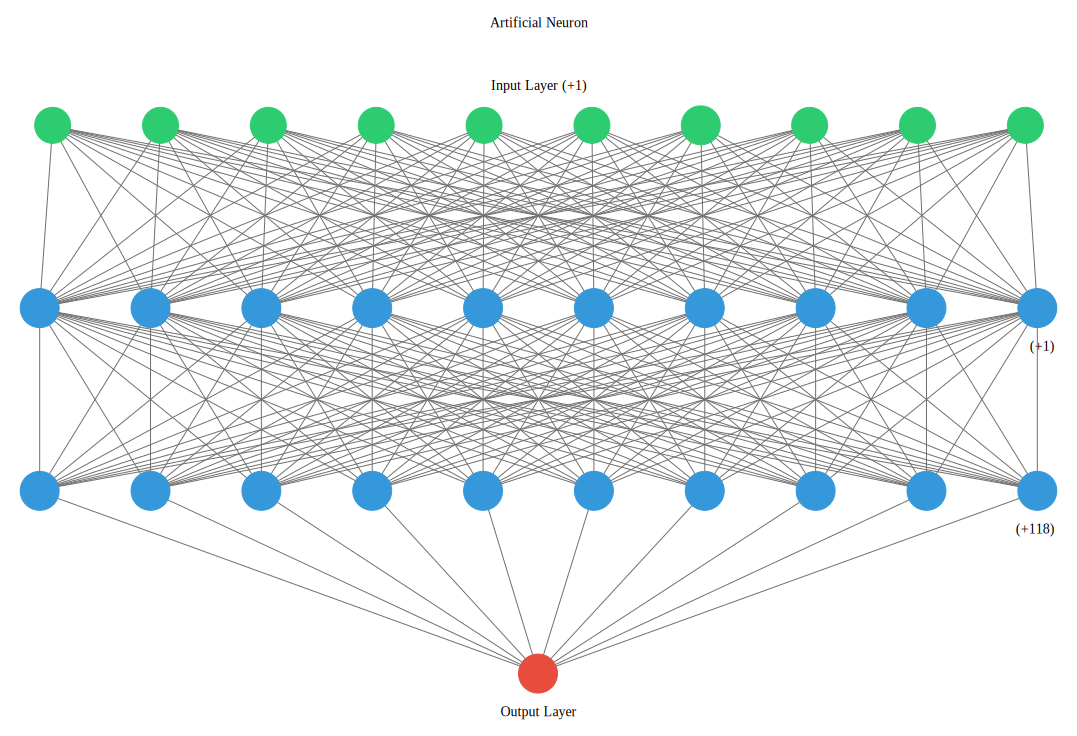

In [ ]:
graph_file = graphviz.Source.from_file('network.gv')
graph_file